<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here

!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium




Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [2]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [3]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt8178634/reviews/?ref_=tt_ql_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element_by_class_name("ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  if sys.path[0] == '':


Length of data frame is 125


,Title,Review
0,A weak writing sparkled by Rajamouli's extraor...,RRR (2022) : Movie Review -\n\nHigh and Low. N...
1,If you'd like to see an Indian movie and aren'...,The Cinemark near me has started to show India...
2,High Voltage EnteRRRtainment,
3,"Ravishing, Refreshing, Recommendable.","If Magadheera, Eega and the Baahubali movies w..."
4,Vintage Bollywood!,
...,...,...
120,Nothing short of a spectacle,Captivating right from the first frame until t...
121,Masterpiece.,Tremendous work done by SS Rajamauli Sir... Su...
122,Worth a time's watch,"Something is missing, but the visuals are damn..."
123,One of the best movies of Bharatvarsh,Wonderful story.\n\nGreat acting..\n\nAmazing ...


In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [5]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [14]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [16]:
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [17]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [18]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('err', '2022', 'movi'): 1,
          ('2022', 'movi', 'review'): 1,
          ('movi', 'review', 'high'): 1,
          ('review', 'high', 'low'): 1,
          ('high', 'low', 'in'): 1,
          ('low', 'in', 'talk'): 1,
          ('in', 'talk', 'air'): 1,
          ('talk', 'air', 'kurosawa'): 1,
          ('air', 'kurosawa', 'japanes'): 1,
          ('kurosawa', 'japanes', 'flick'): 1,
          ('japanes', 'flick', '1963'): 1,
          ('flick', '1963', 'in'): 1,
          ('1963', 'in', 'talk'): 1,
          ('in', 'talk', 'is'): 1,
          ('talk', 'is', 'rajamouli'): 1,
          ('is', 'rajamouli', 'err'): 1,
          ('rajamouli', 'err', 'actual'): 1,
          ('err', 'actual', 'that'): 1,
          ('actual', 'that', 'best'): 1,
          ('that', 'best', 'brief'): 1,
          ('best', 'brief', 'film'): 1,
          ('brief', 'film', 'think'): 1,
          ('film', 'think', 'is'): 1,
          ('think', 'is', 'rajamouli'): 1,
          ('is', 'rajamouli', 'mak

In [19]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

Streaming output truncated to the last 5000 lines.
('vex', 'surprisingli'):0.06666666666666667
('surprisingli', 'good'):0.5
('good', 'except'):0.01639344262295082
('except', 'lap'):0.1
('lap', 'watch'):1.0
('watch', 'd'):0.10666666666666667
('d', 'theater'):0.045454545454545456
('theater', 'great'):0.06666666666666667
('great', 'sound'):0.025
('sound', 'otherwis'):0.16666666666666666
('otherwis', 'miss'):0.5
('miss', 'unimagin'):0.08333333333333333
('unimagin', 'experi'):0.5
('experi', 'greatest'):0.03571428571428571
('greatest', 'achiev'):0.2
('achiev', 'make'):0.14285714285714285
('make', 'industri'):0.014925373134328358
('industri', 'defin'):0.2
('defin', 'franchis'):1.0
('franchis', 'give'):0.5
('give', 'right'):0.041666666666666664
('right', 'follow'):0.07142857142857142
('follow', 'expect'):0.14285714285714285
('expect', 'higher'):0.04
('higher', 'challeng'):0.3333333333333333
('challeng', 'higher'):0.3333333333333333
('higher', 'chanc'):0.3333333333333333
('chanc', 'missil'):0.2

In [20]:
whole_dataset = ''
index = []
i = 1
for line in df['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [22]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [23]:
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in df['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in df['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df

,movi review high,talk air kurosawa japanes flick,rajamouli err,brief film,massfriendli commerci film,long time bahubali,popular becam household name brand natur anyth,high filmmak,bahubali santo,fact film,...,action stori,ramayan mahabharat,visual damn,great action convinc,arm emot,great bahubali seri,wonder stori,great act amaz song,great action wonder danc dont,time experi movi life u
Review-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Review-124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [24]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.010096,0.020243,0.0,0.026385,0.0,0.029788,0.05374,0.045343,0.03188,...,0.046785,0.0,0.103716,0.088992,0.0,0.110774,0.128755,0.15497,0.180537,0.149787
1,janet,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2,comfortably,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
3,wish,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
4,cameo,0.010096,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.045343,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,regardless,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2345,doctor,0.010096,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2346,screentime,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2347,develop,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000


In [25]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [26]:
query_sentence = 'The perfect portrait of a decline to insanity" & Joaquin Phoenix portrays this flawlessly in a performance of a lifetime. Choreographed impeccably by Todd Phillips & is nothing short of breathtaking. The cinematography & backdrop ideology of such an original film for such a complex character is only complimented by the superb soundtrack & acting. A hauntingly beautiful film & A Definate 10/10. Edit: Bring on part 2 plssssss!. We all want it!.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}  

In [27]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [28]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [29]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,RRR (2022) : Movie Review -\n\nHigh and Low. N...,0.036497
1,The Cinemark near me has started to show India...,0.041091
2,,None
3,"If Magadheera, Eega and the Baahubali movies w...",0.033826
4,,None
...,...,...
120,Captivating right from the first frame until t...,0.052963
121,Tremendous work done by SS Rajamauli Sir... Su...,0.062869
122,"Something is missing, but the visuals are damn...",0.0
123,Wonderful story.\n\nGreat acting..\n\nAmazing ...,0.042563


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [35]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.6864716e-03 -2.1070207e-03  1.4183939e-03  4.9229958e-03
  4.2708223e-03 -1.3083545e-03 -1.4661376e-03  1.7044619e-03
  3.9471695e-03  1.6109402e-03 -1.9217926e-03 -2.0023684e-03
  2.1967806e-03 -1.6393649e-03 -1.9670792e-03  2.6215834e-03
  1.7313031e-03  4.7627646e-03  4.5037488e-03  4.5818710e-03
 -1.5716768e-03  1.9519440e-03  3.5165940e-04  2.4531183e-03
 -2.2480218e-03 -9.3159504e-04  4.0399851e-03 -2.0860541e-03
 -4.7726189e-03  2.1155921e-03  1.7695734e-03  4.7282963e-03
 -9.5772848e-04  5.0570938e-04  2.0006287e-04 -4.1027125e-03
 -2.2657216e-03 -1.8394151e-03 -2.9763591e-03  3.9591491e-03
  6.2792347e-04 -1.6218414e-04  4.1861702e-03 -3.8813779e-03
  4.2043473e-03 -1.6556499e-03 -3.9347383e-04  1.0074122e-03
 -1.3184750e-03  3.5440933e-03 -3.2310437e-03 -1.5747214e-03
  7.2434239e-05 -1.3573715e-03  3.8720444e-0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


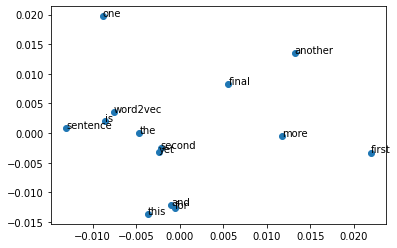

In [36]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/JaideepAluru/Jaideep_INFO5731_-SPRING2022-/blob/main/reviews.csv



